# Ejercicio 4
El archivo Balance.csv tiene información sobre un experimento psicológico realizado para evaluar el aprendizaje en los niños. Cada fila de la tabla tiene las características de una balanza, referidas a la longitud de los brazos izquierdo y derecho de la balanza y al peso que hay en cada brazo, y un atributo que indica si la balanza se inclina al lado izquierdo (L), derecho (R), o está balanceada (B).

Utilice una parte de los ejemplos para entrenar un multiperceptrón que sea capaz que predecir si la balanza está inclinada a derecha, a izquierda o si está balanceada. Analice la precisión de la red sobre los ejemplos de entrenamiento y sobre los de testeo.

Fuente: Balance Scale Data Set - https://archive.ics.uci.edu/ml/datasets/Balance+Scale

In [3]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

nombre_archivo = '../Datos/Balance.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
# %% Carga de dataset con formato R, G, B, Color
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])
# df = df.select_dtypes(include=np.number)
df

,Balance,LeftWeight,LeftDist,RightWeight,RightDist
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


In [4]:
# %% separa atributos y clases
X_raw = np.array(df.iloc[:,1:])  # recupera todas las columnas salvo la primera (es la clase)
Y_raw = np.array(df.iloc[:,0:1])    # recupera solo la última columna (es la clase)

# Binarizador para convertir el nombre de la clase en one hot encoding
binarizer = preprocessing.LabelBinarizer()
# # Binariza cada clase como una combinación de un 1 y 0s
Y_raw = binarizer.fit_transform(Y_raw)
# # Y_raw==pd.get_dummies(df[' Balance']).to_numpy() # forma alternativa para codificar

print('Las clases del dataset son :', binarizer.classes_)
# print(Y_raw

# Escala los atributos de los ejemplo
scaler = preprocessing.StandardScaler()
# scaler = preprocessing.MinMaxScaler()
X_raw  = scaler.fit_transform( X_raw )

# %% Separa ejemplos para enternamiento y testeo

TEST_SIZE = 0.3 # proporcion entre testeo entre entrenamiento y testeo
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_raw, Y_raw, test_size=TEST_SIZE)#, random_state=42)

print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(Y_train), len(Y_test) ))


Las clases del dataset son : ['B' 'L' 'R']

Datos de Entrenamiento: 437   Datos de Testeo: 188


In [5]:
FunH = 'tanh'   # identity logistic tanh relu
ocultas = (7)

alfa = 0.05
CotaError = 1.0e-5
MAX_ITE = 2500

modelo = MLPClassifier(max_iter=MAX_ITE, hidden_layer_sizes=ocultas, alpha=alfa,
                       solver='sgd', activation=FunH, tol=CotaError,
                       verbose=False).fit(X_train, Y_train)

modelo.out_activation_ = 'softmax'

#  ########### Medición del entrenamiento ######################
Y_pred = modelo.predict(X_train)
score = modelo.score(X_train, Y_train)

# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(Y_train)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('Score: %6.2f%%' % (score) )

Efectividad:  92.91%
Score:   0.91%


/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


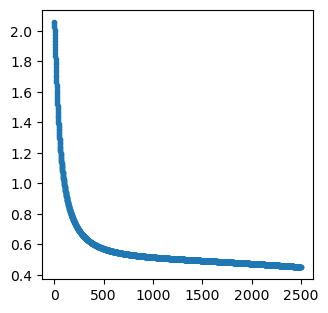

In [7]:

## https://www.youtube.com/watch?v=GsYOgr2K4vU

import matplotlib.pyplot as plt
plt.figure(figsize=(3.5, 3.5))
plt.plot(modelo.loss_curve_, ".-") ### funcion de perdida por iteracion
plt.show()